In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-dataset/heart.csv


In [2]:
import pandas as pd
heart_df = pd.read_csv('/kaggle/input/heart-failure-dataset/heart.csv')

<h3>Part 1: Data Loading & initial checking</h3>

In [3]:
#initial inspection
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#checking if there's missing data
heart_df.isna().sum()

#seems like there's no missing data, good

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<h3>Part 2: Exploratory data analysis</h3>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

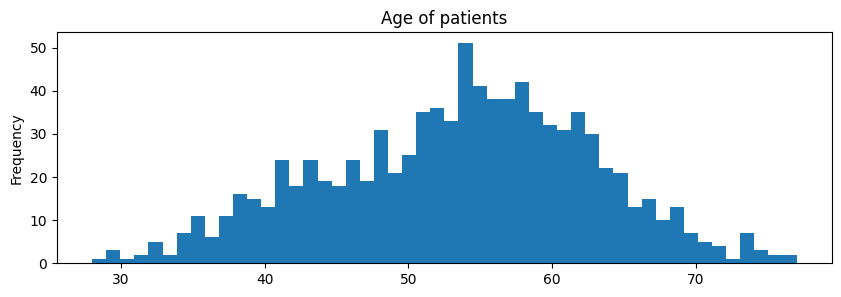

In [8]:
plt.figure(figsize = (10,3))
#sns.histplot(heart,x='Age')
#sns.histplot(heart_df['Age'],bins=40,kde=True)
heart_df['Age'].plot(kind='hist',bins=50)
plt.title('Age of patients')
plt.show()

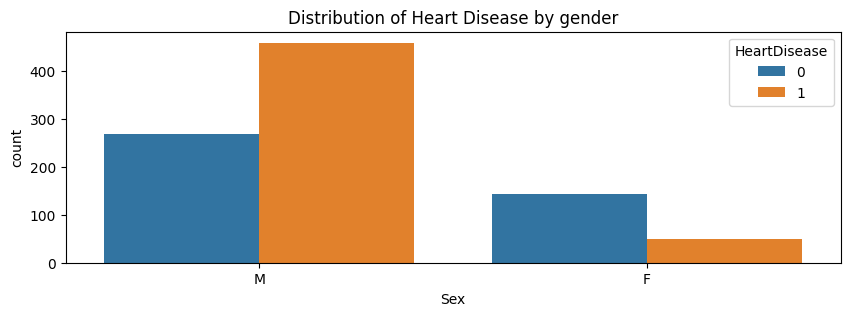

In [9]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df,x='Sex',hue='HeartDisease')
plt.title('Distribution of Heart Disease by gender')
plt.show()

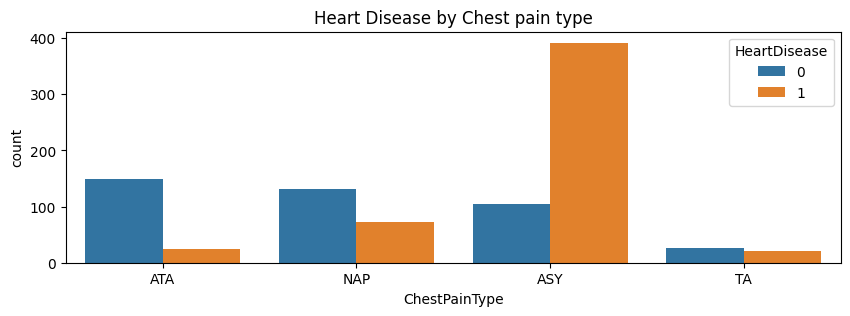

In [10]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df,x='ChestPainType',hue='HeartDisease')
plt.title('Heart Disease by Chest pain type')
plt.show()

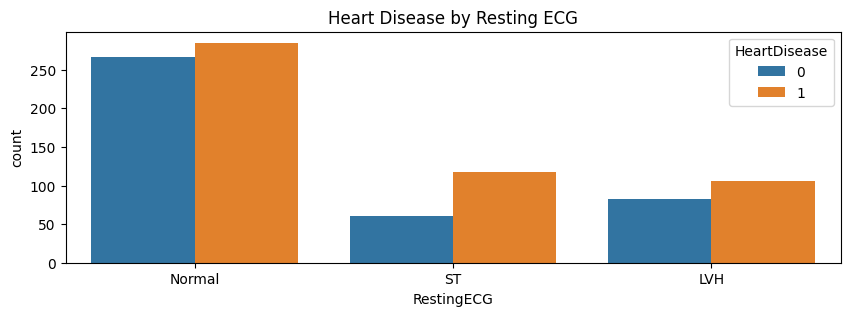

In [11]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df,x='RestingECG',hue='HeartDisease')
plt.title('Heart Disease by Resting ECG')
plt.show()

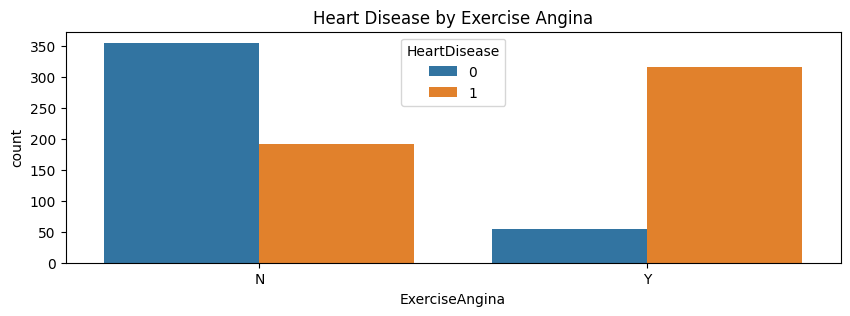

In [12]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df,x='ExerciseAngina',hue='HeartDisease')
plt.title('Heart Disease by Exercise Angina')
plt.show()

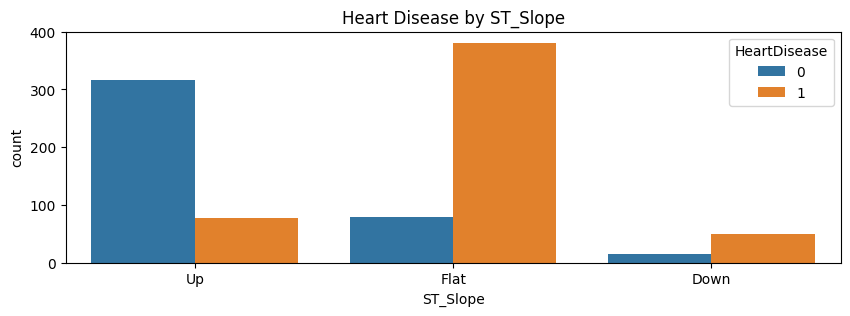

In [13]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df,x='ST_Slope',hue='HeartDisease')
plt.title('Heart Disease by ST_Slope')
plt.show()

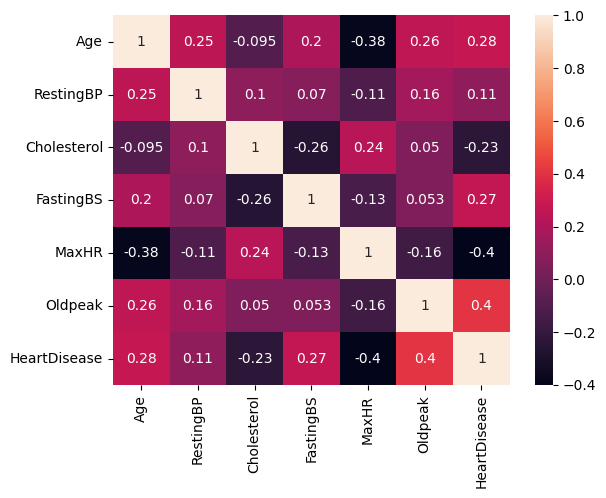

In [14]:
numeric_cols = heart_df.select_dtypes(exclude='object')
sns.heatmap(numeric_cols.corr(),annot=True)
plt.show()

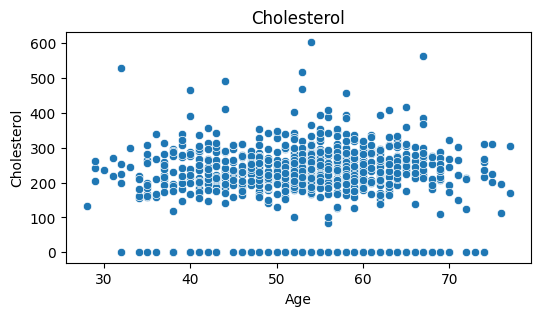

In [15]:
plt.figure(figsize = (6,3))
sns.scatterplot(heart_df,x='Age',y='Cholesterol',)
plt.title('Cholesterol')
plt.show()

<p>Here's a note, I have noticed that there are several records that have zero cholesterol. So I suspect this being an anomaly that is needed to be fixed. But first, is there a record of having a heart disease and zero cholesterol at the same time?</p>

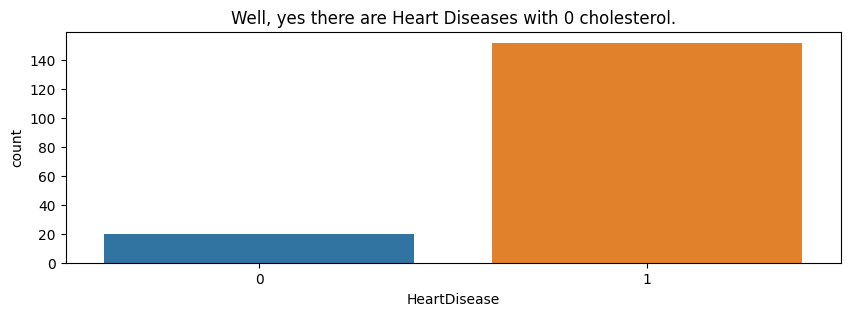

In [16]:
plt.figure(figsize = (10,3))
sns.countplot(heart_df[heart_df['Cholesterol'] == 0],x='HeartDisease')
plt.title('Well, yes there are Heart Diseases with 0 cholesterol.')
plt.show()

<h3>Part 3: Data Preprocessing & Cleaning</h3>

<p>The first thing we're going to fix first is the Cholesterol Column.
Now, what is the average cholesterol of someone having a heartdisease and not?

</p>

In [17]:
non_zero_cholesterol = heart_df[heart_df['Cholesterol'] > 0]
non_zero_cholesterol.groupby(by='HeartDisease')['Cholesterol'].mean()

HeartDisease
0    238.769231
1    251.061798
Name: Cholesterol, dtype: float64

In [18]:
#function for modifying zero cholesterol values
def mod_zero_chol(chol,hdisease):
    if(chol == 0 & hdisease == 1):
        return 251.061798
    elif(chol == 0 & hdisease == 0):
        return 238.769231
    else:
        return chol

In [19]:
heart_df['Cholesterol'] = heart_df.apply(lambda x: mod_zero_chol(x['Cholesterol'],x['HeartDisease']),axis=1)
heart_df[heart_df['Cholesterol'] < 1]['Cholesterol'].sum()

#Good, there's none zero values

0.0

<p>Now, creating dummies!</p>

In [20]:
#Checking the columns if categorical or continuous
#getting the non numeric columns
obj_cols = heart_df.select_dtypes(include='object')

In [21]:
for i in obj_cols.columns:
    print(heart_df[i].value_counts())
    print('\n')

Sex
M    725
F    193
Name: count, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




<p>Good, we can create dummies for ['ChestPainType','ST_Slope','RestingECG']. And convert Sex and ExerciseAngina to binary.</p>

In [22]:
dummies = pd.get_dummies(heart_df[['ChestPainType','ST_Slope','RestingECG']],drop_first=True)
heart_df = pd.concat([heart_df.drop(['ChestPainType','ST_Slope','RestingECG'],axis=1),dummies],axis=1)

<p>Since, we forgot to put dtype, dummies became boolean. So first we need to fix that and convert them to 0 and 1.</p>

In [23]:
#Select boolean columns
bool_cols = heart_df.select_dtypes(include='bool')

for col in bool_cols:
    heart_df[col] = heart_df[col].astype(int)

<p>Alright, Let's proceed to converting Sex and ExerciseAngina to binary.</p>

In [24]:
#Sex Column
heart_df['Sex'] = heart_df['Sex'].map(lambda x: 1 if x == 'M' else 0)

In [25]:
#ExerciseAngina Column
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map(lambda x: 1 if x == 'Y' else 0)

<p>Now, let's proceed on creating a model.</p>

<h3>Part 4: Training & Testing</h3>

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
#define what's x and y
y = heart_df['HeartDisease'].values
X = heart_df.drop('HeartDisease',axis=1).values

In [28]:
#train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [29]:
X_train.shape

(615, 15)

In [30]:
X_test.shape

(303, 15)

In [31]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [36]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [37]:
#Prediction
y_pred = model.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8250825082508251
Confusion Matrix:
 [[112  31]
 [ 22 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       143
           1       0.82      0.86      0.84       160

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.83      0.83      0.82       303



<p>The model's not perfect but it has 82% accuracy, but we can still feature engineer to improve. </p>